# Enhancing E-Commerce Strategies Through Customer Behavior Analysis
<span style="font-size:20px;"> - Amisha Kelkar, Arundhati (Ari) Kolahal, Chaitali Deshmukh, Neha Shastri

## Data Preprocessing and Exploratory Data Analysis
* Implementing NLP concepts, on the Amazon Reviews Dataset.
* From all the categories available, the category, `Appliances` was selected for the project.

### Importing Relevant Libraries

In [ ]:
pip install sentence_transformers
pip install wordcloud
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Loading the Dataset

1. Reviews

In [ ]:
def json_to_dataframe(file_path):

    try:
        data = []
        with open(file_path, 'r') as f:
            for line in f:
                try:
                    data.append(json.loads(line))
                except json.JSONDecodeError as e:
                    print(f"Skipping invalid JSON line: {line.strip()} due to error: {e}")
        return pd.DataFrame(data)

    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None
# Example usage
file_path = 'Appliances.jsonl'  # Replace with your file path
reviews = json_to_dataframe(file_path)

In [ ]:
reviews.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Work great,work great. use a new one every month,[],B01N0TQ0OH,B01N0TQ0OH,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1519317108692,0,True
1,5.0,excellent product,Little on the thin side,[],B07DD2DMXB,B07DD37QPZ,AHWWLSPCJMALVHDDVSUGICL6RUCA,1664746863446,0,True
2,5.0,Happy customer!,"Quick delivery, fixed the issue!",[],B082W3Z9YK,B082W3Z9YK,AHZIJGKEWRTAEOZ673G5B3SNXEGQ,1607225435363,0,True
3,5.0,Amazing value,I wasn't sure whether these were worth it or n...,[],B078W2BJY8,B078W2BJY8,AFGUPTDFAWOHHL4LZDV27ERDNOYQ,1534104184306,0,True
4,5.0,Dryer parts,Easy to install got the product expected to re...,[],B08C9LPCQV,B08C9LPCQV,AELFJFAXQERUSMTXJQ6SYFFRDWMA,1620176603754,0,True


In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207299 entries, 0 to 207298
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   rating             207299 non-null  float64
 1   title              207299 non-null  object 
 2   text               207299 non-null  object 
 3   images             207299 non-null  object 
 4   asin               207299 non-null  object 
 5   parent_asin        207299 non-null  object 
 6   user_id            207299 non-null  object 
 7   timestamp          207299 non-null  int64  
 8   helpful_vote       207299 non-null  int64  
 9   verified_purchase  207299 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 14.4+ MB


In [ ]:
reviews['timestamp'] = pd.to_datetime(reviews['timestamp'], unit='ms')

2. Meta Data

In [ ]:
# prompt: read a json nl file and convert to dataframe

def json_to_dataframe(file_path):

    try:
        data = []
        with open(file_path, 'r') as f:
            for line in f:
                try:
                    data.append(json.loads(line))
                except json.JSONDecodeError as e:
                    print(f"Skipping invalid JSON line: {line.strip()} due to error: {e}")
        return pd.DataFrame(data)

    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None
# Example usage
file_path = 'meta_Appliances.jsonl'  # Replace with your file path
appliance = json_to_dataframe(file_path)

In [ ]:
appliance.head()

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
0,Industrial & Scientific,"ROVSUN Ice Maker Machine Countertop, Make 44lb...",3.7,61,[【Quick Ice Making】This countertop ice machine...,[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'Our Point of View on the Euhomy Ic...,ROVSUN,"[Appliances, Refrigerators, Freezers & Ice Mak...","{'Brand': 'ROVSUN', 'Model Name': 'ICM-2005', ...",B08Z743RRD,None,NaN,NaN
1,Tools & Home Improvement,"HANSGO Egg Holder for Refrigerator, Deviled Eg...",4.2,75,"[Plastic, Practical Kitchen Storage - Our egg ...",[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': '10 Eggs Egg Holder for Refrigerato...,HANSGO,"[Appliances, Parts & Accessories, Refrigerator...","{'Manufacturer': 'HANSGO', 'Part Number': 'HAN...",B097BQDGHJ,None,NaN,NaN
2,Tools & Home Improvement,"Clothes Dryer Drum Slide, General Electric, Ho...",3.5,18,[],"[Brand new dryer drum slide, replaces General ...",NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],GE,"[Appliances, Parts & Accessories]","{'Manufacturer': 'RPI', 'Part Number': 'WE1M33...",B00IN9AGAE,None,NaN,NaN
3,Tools & Home Improvement,154567702 Dishwasher Lower Wash Arm Assembly f...,4.5,26,[MODEL NUMBER:154567702 Dishwasher Lower Wash ...,[MODEL NUMBER:154567702 Dishwasher Lower Wash ...,NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],folosem,"[Appliances, Parts & Accessories, Dryer Parts ...","{'Manufacturer': 'folosem', 'Part Number': '15...",B0C7K98JZS,None,NaN,NaN
4,Tools & Home Improvement,Whirlpool W10918546 Igniter,3.8,12,[This is a Genuine OEM Replacement Part.],[Whirlpool Igniter],25.07,[{'thumb': 'https://m.media-amazon.com/images/...,[],Whirlpool,"[Appliances, Parts & Accessories]","{'Manufacturer': 'Whirlpool', 'Part Number': '...",B07QZHQTVJ,None,NaN,NaN


In [ ]:
appliance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94327 entries, 0 to 94326
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   main_category    89651 non-null  object 
 1   title            94327 non-null  object 
 2   average_rating   94327 non-null  float64
 3   rating_number    94327 non-null  int64  
 4   features         94327 non-null  object 
 5   description      94327 non-null  object 
 6   price            46726 non-null  float64
 7   images           94327 non-null  object 
 8   videos           94327 non-null  object 
 9   store            93411 non-null  object 
 10  categories       94327 non-null  object 
 11  details          94327 non-null  object 
 12  parent_asin      94327 non-null  object 
 13  bought_together  0 non-null      object 
 14  subtitle         5 non-null      object 
 15  author           1 non-null      object 
dtypes: float64(2), int64(1), object(13)
memory usage: 11.5+ MB

### Preprocessing and Subsetting Data

* From the available reviews, a subset of verified reviews was used for subsequent usage.
* Of the verified reviews, reviews per product were counted and top 100 products were subsetted.


In [ ]:
verified_reviews = reviews[reviews['verified_purchase'] == True]
top_products = (verified_reviews.groupby('parent_asin')
                .size()
                .reset_index(name='verified_review_count')
                .nlargest(100, 'verified_review_count'))

* After subsetting the top 100 products, the top 100 recent reviews for each of them were selected.

In [ ]:
top_products= top_products['parent_asin'].values
verified_reviews_top_100 = verified_reviews[verified_reviews['parent_asin'].isin(top_products)]

# Step 2: Sort by 'parent_asin' and 'timestamp' to get the most recent reviews first
verified_reviews_sorted = verified_reviews_top_100.sort_values(by=['parent_asin', 'timestamp'], ascending=[True, False])


print(verified_reviews_sorted.head())


                         rating                            title  \
timestamp                                                          
2023-01-09 22:25:47.347     5.0         Used these for 10+ years   
2022-12-08 17:57:15.352     5.0                     Water filter   
2022-11-06 19:56:08.411     5.0                         Perfect!   
2022-10-28 15:48:59.343     5.0  Don't settle for lesser filters   
2022-10-24 14:47:49.052     5.0                excellent product   

                                                                      text  \
timestamp                                                                    
2023-01-09 22:25:47.347  I have used this on my Fridge for over 10 year...   
2022-12-08 17:57:15.352  I like knowing the water in my fridge. The fil...   
2022-11-06 19:56:08.411  You would be silly not to buy these here. Do t...   
2022-10-28 15:48:59.343  Check the specifications on the generic filter...   
2022-10-24 14:47:49.052                                

In [ ]:
recent_100_reviews = verified_reviews_sorted.groupby('parent_asin').head(100)
print(recent_100_reviews.head())

                         rating                            title  \
timestamp                                                          
2023-01-09 22:25:47.347     5.0         Used these for 10+ years   
2022-12-08 17:57:15.352     5.0                     Water filter   
2022-11-06 19:56:08.411     5.0                         Perfect!   
2022-10-28 15:48:59.343     5.0  Don't settle for lesser filters   
2022-10-24 14:47:49.052     5.0                excellent product   

                                                                      text  \
timestamp                                                                    
2023-01-09 22:25:47.347  I have used this on my Fridge for over 10 year...   
2022-12-08 17:57:15.352  I like knowing the water in my fridge. The fil...   
2022-11-06 19:56:08.411  You would be silly not to buy these here. Do t...   
2022-10-28 15:48:59.343  Check the specifications on the generic filter...   
2022-10-24 14:47:49.052                                

In [ ]:
cols = ['title', 'text']
recent_100_reviews.loc[:, cols] = recent_100_reviews[cols].fillna('').astype(str)
recent_100_reviews.loc[:, 'product_review'] = recent_100_reviews['title'] + ' ' + recent_100_reviews['text']


/var/tmp/ipykernel_5564/1585336259.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_100_reviews.loc[:, 'product_review'] = recent_100_reviews['title'] + ' ' + recent_100_reviews['text']


In [ ]:
#100 product
top_100_products = appliance[appliance['parent_asin'].isin(top_products)]
print(top_100_products.info())

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 49 to 76038
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   main_category    98 non-null     object 
 1   title            100 non-null    object 
 2   average_rating   100 non-null    float64
 3   rating_number    100 non-null    int64  
 4   features         100 non-null    object 
 5   description      100 non-null    object 
 6   price            87 non-null     float64
 7   images           100 non-null    object 
 8   videos           100 non-null    object 
 9   store            100 non-null    object 
 10  categories       100 non-null    object 
 11  details          100 non-null    object 
 12  parent_asin      100 non-null    object 
 13  bought_together  0 non-null      object 
 14  subtitle         0 non-null      object 
 15  author           0 non-null      object 
dtypes: float64(2), int64(1), object(13)
memory usage: 13.3+ KB
None


* A `product_description` column was created by concatenating several columns so that the new column could be used for implementeing NLP techniques.

In [ ]:
# Ensure we're working on a copy to avoid SettingWithCopyWarning
top_100_products = top_100_products.copy()

cols = ['title','description', 'main_category', 'features', 'store', 'categories', 'details' ]
# Use .loc to ensure proper assignment
top_100_products.loc[:, cols] = top_100_products[cols].fillna('').astype(str)

# Concatenate product description columns
top_100_products.loc[:, 'product_description'] = (
    top_100_products['title'] + ' ' +
    top_100_products['description'] + " " +
    top_100_products['main_category'] + " " +
    top_100_products['features'] + " " +
    top_100_products['store'] + " " +
    top_100_products['categories'] + ' ' +
    top_100_products['details']
)


* Finally, the tables with product details and reviews were merged to get the final dataframe.

In [ ]:
# Merge the top_100_products dataframe with recent_reviews to link product details with reviews
merged_df = top_100_products[['parent_asin', 'title', 'product_description']].merge(recent_100_reviews[['parent_asin','product_review', 'timestamp']],
                                 on='parent_asin', how='inner')


In [ ]:
# Group by 'parent_asin' and aggregate reviews and timestamps
aggregated_df = merged_df.groupby('parent_asin').agg(
    product_title=('title', 'first'),  # Only one title per product
    product_description=('product_description', 'first'),  # Only one description per product
    product_reviews=('product_review', list),  # List of reviews for the product
    review_timestamps=('timestamp', list)  # List of review timestamps
).reset_index()

* Saved the dataframe formed as `product_recommendation.parquet` which was used in downstream tasks.

In [ ]:
aggregated_df.read_parquet('product_recommendation.parquet')

### Exploratory Data Anlaysis (EDA)
* EDA was conducted for the dataframes created.

In [ ]:
reviews.describe()

,rating,timestamp,helpful_vote
count,207299.000000,207299,207299.000000
mean,4.362486,2019-04-04 23:53:44.523584768,1.112495
min,1.000000,2003-06-04 04:14:46,0.000000
25%,4.000000,2017-04-17 23:43:19.500000,0.000000
50%,5.000000,2019-09-23 00:49:53.238000128,0.000000
75%,5.000000,2021-05-31 00:35:00.474000128,0.000000
max,5.000000,2023-03-23 23:36:59.894000,5704.000000
std,1.226000,NaN,17.740601


In [ ]:
appliance.describe()

,average_rating,rating_number,price
count,94327.000000,94327.000000,46726.000000
mean,4.118859,136.367901,86.479954
std,0.864040,977.516100,325.318397
min,1.000000,1.000000,0.010000
25%,3.800000,3.000000,14.990000
50%,4.300000,13.000000,26.990000
75%,4.700000,53.000000,58.130000
max,5.000000,90203.000000,21095.620000


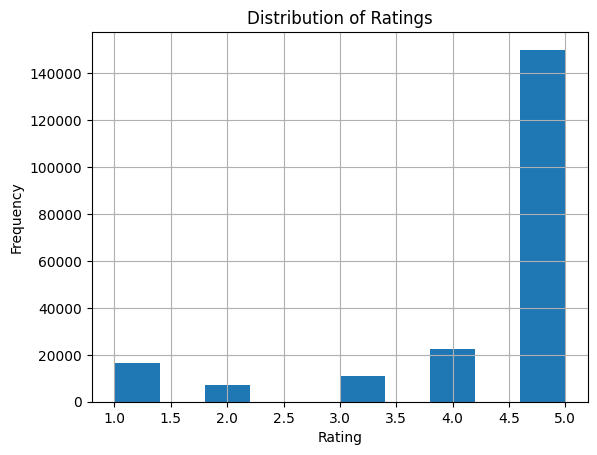

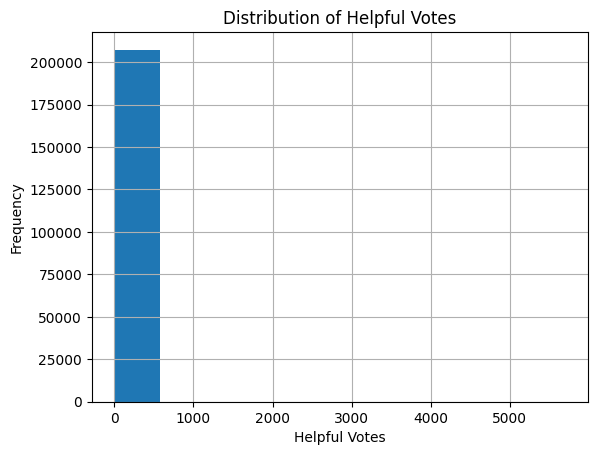

In [ ]:
# Plot histogram for ratings
reviews['rating'].hist()
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for helpful votes
reviews['helpful_vote'].hist()
plt.title('Distribution of Helpful Votes')
plt.xlabel('Helpful Votes')
plt.ylabel('Frequency')
plt.show()


**Distribution of Ratings and Helpful Votes in Customer Reviews**<br>
The first histogram illustrates the distribution of ratings, revealing that most users gave 5-star ratings, while lower ratings are significantly less frequent. This suggests a strong positive bias in customer reviews. The second histogram shows the distribution of helpful votes, where the majority of reviews received very few votes, indicating that only a small subset of reviews is widely recognized as helpful by users.









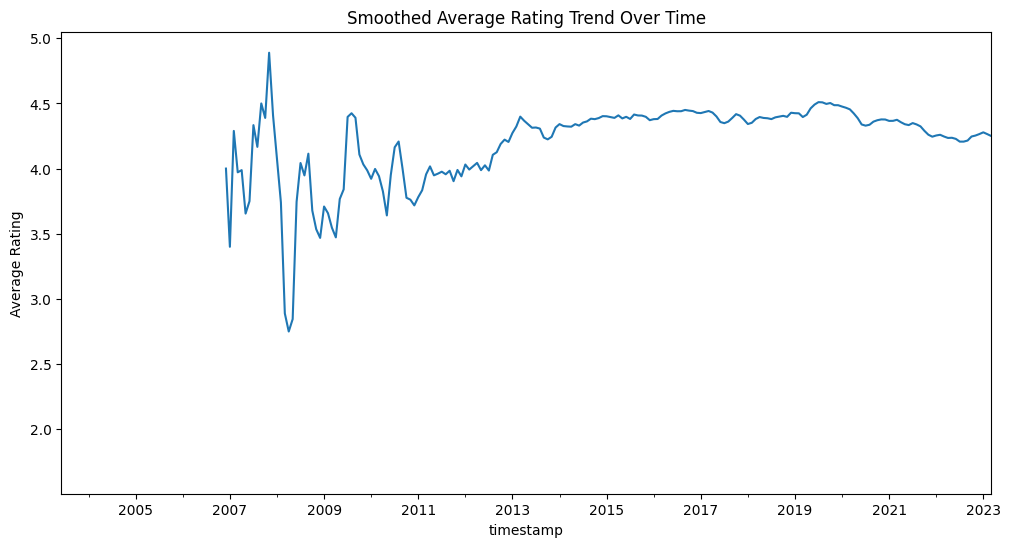

In [ ]:
# Resample by month and calculate mean rating for each month
reviews.set_index('timestamp', inplace=True)
monthly_rating = reviews['rating'].resample('M').mean()


# Apply a rolling mean with a window of 3 months to smooth the data
smoothed_monthly_rating = monthly_rating.rolling(window=3).mean()

# Plot the smoothed trend
smoothed_monthly_rating.plot(figsize=(12, 6))
plt.title('Smoothed Average Rating Trend Over Time')
plt.ylabel('Average Rating')
plt.show()


**Smoothed Average Rating Trend Over Time**<br>
The line chart visualizes the monthly average ratings over time, with a 3-month rolling average applied for smoothing. Initially, there are large fluctuations in ratings, especially between 2006 and 2010, suggesting potential changes in product quality, consumer preferences, or external factors influencing reviews. After 2011, the ratings stabilize around 4.0 to 4.5, indicating sustained customer satisfaction. The slight decline in recent years may suggest changing user expectations or product performance issues.

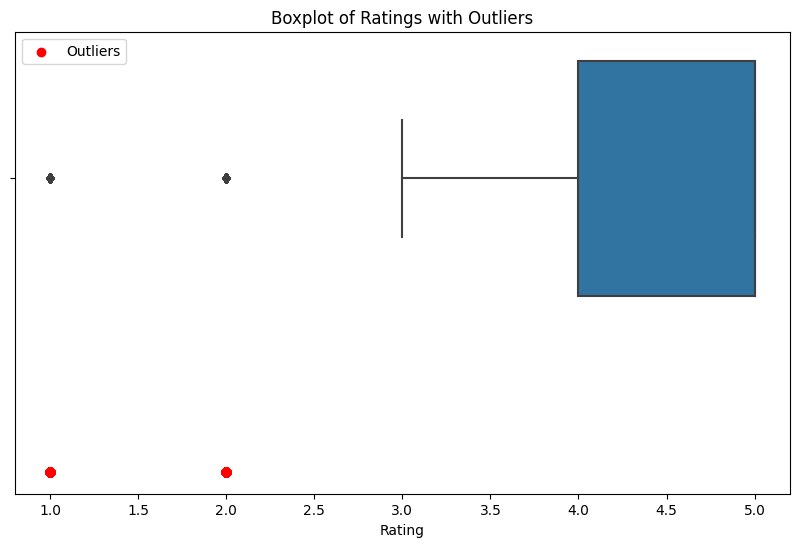

In [ ]:
# Calculate the IQR for ratings
Q1 = reviews['rating'].quantile(0.25)
Q3 = reviews['rating'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers
outliers = reviews[(reviews['rating'] < lower_bound) | (reviews['rating'] > upper_bound)]

# Plot the ratings and mark the outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=reviews['rating'])
plt.scatter(outliers['rating'], [1] * len(outliers), color='red', label='Outliers', zorder=5)
plt.title('Boxplot of Ratings with Outliers')
plt.xlabel('Rating')
plt.legend()
plt.show()


**Boxplot of Ratings with Outliers**<br>
The boxplot visualizes the distribution of ratings and highlights outliers using Interquartile Range (IQR) detection. Most ratings are clustered around 4 to 5 stars, indicating a generally positive sentiment. However, extreme values below 2 stars are identified as outliers (marked in red), suggesting unusual or highly negative reviews. The presence of these outliers may indicate customer dissatisfaction, defective products, or biased reviews, requiring further investigation.